In [103]:
import numpy as np
import pandas as pd

In [95]:
with open('C:/Users/admin/Desktop/210603~/210610/데이터/ratings.dat','r') as f:
    ratings = f.readlines()

In [97]:
with open('C:/Users/admin/Desktop/210603~/210610/데이터/users.dat','r') as f:
    users = f.readlines()

In [98]:
with open('C:/Users/admin/Desktop/210603~/210610/데이터/movies.dat','r', encoding = 'ISO-8859-1') as f:
    movies = f.readlines()

In [122]:
user_ls = []
rating_ls = []
movie_ls = []

In [123]:
for i in range(len(users)):
    user_ls.append(users[i][:-1].split('::'))

In [124]:
for i in range(len(ratings)):
    rating_ls.append(ratings[i][:-1].split('::'))

In [125]:
for i in range(len(movies)):
    movie_ls.append(movies[i][:-1].split('::'))

In [129]:
user_df = pd.DataFrame(user_ls)
rating_df = pd.DataFrame(rating_ls)
movie_df = pd.DataFrame(movie_ls)

In [133]:
user_df.columns = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_df.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_df.columns = ['movie_id', 'title', 'genres']

In [170]:
total = pd.merge(pd.merge(user_df, rating_df, how = 'outer'), movie_df, how = 'outer')
total

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000381,NaN,NaN,NaN,NaN,NaN,3650,NaN,NaN,Anguish (Angustia) (1986),Horror
1000382,NaN,NaN,NaN,NaN,NaN,3750,NaN,NaN,Boricua's Bond (2000),Drama
1000383,NaN,NaN,NaN,NaN,NaN,3829,NaN,NaN,Mad About Mambo (2000),Comedy|Romance
1000384,NaN,NaN,NaN,NaN,NaN,3856,NaN,NaN,Autumn Heart (1999),Drama


In [171]:
## 평점을 매기지 않은 영화들
total.tail(177)  

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
1000209,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,Guardian Angel (1994),Action|Drama|Thriller
1000210,NaN,NaN,NaN,NaN,NaN,109,NaN,NaN,Headless Body in Topless Bar (1995),Comedy
1000211,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN,Happiness Is in the Field (1995),Comedy
1000212,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,Gospa (1995),Drama
1000213,NaN,NaN,NaN,NaN,NaN,284,NaN,NaN,New York Cop (1996),Action|Crime
...,...,...,...,...,...,...,...,...,...,...
1000381,NaN,NaN,NaN,NaN,NaN,3650,NaN,NaN,Anguish (Angustia) (1986),Horror
1000382,NaN,NaN,NaN,NaN,NaN,3750,NaN,NaN,Boricua's Bond (2000),Drama
1000383,NaN,NaN,NaN,NaN,NaN,3829,NaN,NaN,Mad About Mambo (2000),Comedy|Romance
1000384,NaN,NaN,NaN,NaN,NaN,3856,NaN,NaN,Autumn Heart (1999),Drama


In [172]:
## 제거
total = total.drop(total.index[1000209:])  
total

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [181]:
## rating type int로 변경
total['rating'] = total['rating'].astype(int)

In [263]:
total

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


# **2.영화별 성별 평점 평균을 산출하여 여성 상위/하위 10개 영화의 목록 추출 및 도식화(barplot)**

In [462]:
## 영화, 성별별로 평점의 평균
group_se = total['rating'].groupby([total['title'],total['gender']]).mean()
group_se

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

In [518]:
# 여성평점평균 top10
fem_top10 =[]
for i in group_se[:,'F'].sort_values(ascending=False)[:10].index:
    fem_top10.append([i, group_se[i][0],group_se[i][1]])
fem_top10

TypeError: '(slice(None, None, None), 'F')' is an invalid key

In [474]:
# DataFrame
fem_top10_df = pd.DataFrame(fem_top10)
fem_top10_df

,0,1,2
0,Lamerica (1994),5.0,4.666667
1,"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
2,"Other Side of Sunday, The (Søndagsengler) (1996)",5.0,2.928571
3,Ayn Rand: A Sense of Life (1997),5.0,4.000000
4,For the Moment (1994),5.0,3.000000
5,Country Life (1994),5.0,2.000000
6,Belly (1998),5.0,3.000000
7,Clean Slate (Coup de Torchon) (1981),5.0,3.857143
8,"Woman of Paris, A (1923)",5.0,2.428571
9,Coldblooded (1995),5.0,3.588235


In [475]:
# Column 지정
fem_top10_df.columns = ['title','F','M']

In [476]:
# title을 index로
fem_top10_df = fem_top10_df.set_index('title')

In [477]:
import matplotlib.pyplot as plt

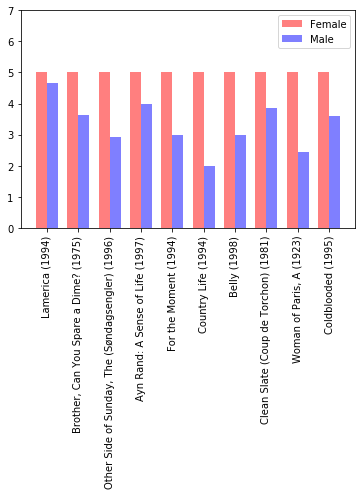

In [479]:
index = np.arange(len(fem_top10_df.index))
bar_width = 0.35
alpha = 0.5
p1 = plt.bar(index - bar_width/2, fem_top10_df['F'], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
p2 = plt.bar(index + bar_width/2, fem_top10_df['M'], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')
plt.xticks(index, list(fem_top10_df.index), rotation = 90)
plt.ylim(0,7)
plt.legend()

In [480]:
# 하위 10개     치타의 평점을 매긴 남자가 없어서 예외처리
fem_bot10 = []
for i in group_se[:,'F'].sort_values()[:10].index:
    try :
        fem_bot10.append([i, group_se[i][0],group_se[i][1]])
    except :
        fem_bot10.append([i,group_se[i][0],0])

In [481]:
# DataFrame
fem_bot10_df = pd.DataFrame(fem_bot10)

In [482]:
# Column 지정
fem_bot10_df.columns = ['title','F','M']

In [483]:
# title을 index로
fem_bot10_df = fem_bot10_df.set_index('title')

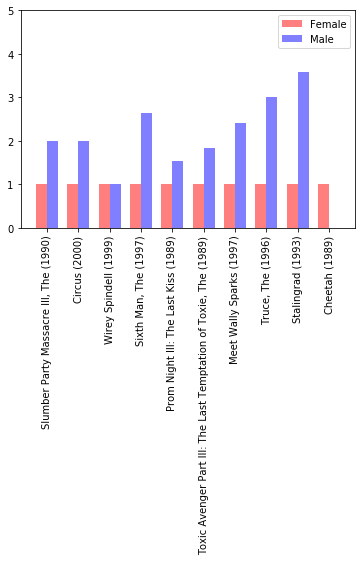

In [485]:
index = np.arange(len(fem_bot10_df.index))
bar_width = 0.35
alpha = 0.5
p1 = plt.bar(index - bar_width/2, fem_bot10_df['F'], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')
p2 = plt.bar(index + bar_width/2, fem_bot10_df['M'], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')
plt.xticks(index, list(fem_bot10_df.index), rotation = 90)
plt.ylim(0,5)
plt.legend()

# **3. 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화**
  
# **- 인기도는 평점으로 평가**

In [439]:
total['rating'].groupby(total['title']).count() >= 300

title
$1,000,000 Duck (1971)                        False
'Night Mother (1986)                          False
'Til There Was You (1997)                     False
'burbs, The (1989)                             True
...And Justice for All (1979)                 False
                                              ...  
Zed & Two Noughts, A (1985)                   False
Zero Effect (1998)                             True
Zero Kelvin (Kjærlighetens kjøtere) (1995)    False
Zeus and Roxanne (1997)                       False
eXistenZ (1999)                                True
Name: rating, Length: 3706, dtype: bool

In [453]:
rat_count = pd.DataFrame(total['rating'].groupby(total['title']).count())
rat_count[rat_count['rating']>300]

,rating
title,
"'burbs, The (1989)",303
10 Things I Hate About You (1999),700
101 Dalmatians (1961),565
101 Dalmatians (1996),364
12 Angry Men (1957),616
...,...
Young Guns (1988),562
Young Guns II (1990),369
Young Sherlock Holmes (1985),379


In [454]:
rat_count[rat_count['rating']>300].index

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '20,000 Leagues Under the Sea (1954)',
       '2001: A Space Odyssey (1968)', '2010 (1984)', '28 Days (2000)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1053)

In [488]:
fem_top10_more300 =[]

In [489]:
# 여성평점평균 top10
for i in rat_count[rat_count['rating']>300].index:
    fem_top10_more300.append([i, group_se[i][0],group_se[i][1]])

In [490]:
fem_top10_more300

[["'burbs, The (1989)", 2.7934782608695654, 2.962085308056872],
 ['10 Things I Hate About You (1999)', 3.646551724137931, 3.3119658119658117],
 ['101 Dalmatians (1961)', 3.7914438502673797, 3.5],
 ['101 Dalmatians (1996)', 3.24, 2.911214953271028],
 ['12 Angry Men (1957)', 4.184397163120567, 4.328421052631579],
 ['13th Warrior, The (1999)', 3.112, 3.168],
 ['20,000 Leagues Under the Sea (1954)', 3.670103092783505, 3.709205020920502],
 ['2001: A Space Odyssey (1968)', 3.8255813953488373, 4.129737609329446],
 ['2010 (1984)', 3.4468085106382977, 3.41371158392435],
 ['28 Days (2000)', 3.2094240837696337, 2.977707006369427],
 ['About Last Night... (1986)', 3.188679245283019, 3.140909090909091],
 ['Absent Minded Professor, The (1961)',
  3.4693877551020407,
  3.4468085106382977],
 ['Absolute Power (1997)', 3.4691358024691357, 3.3277591973244145],
 ['Abyss, The (1989)', 3.659235668789809, 3.689507494646681],
 ['Ace Ventura: Pet Detective (1994)', 3.0, 3.1979166666666665],
 ['Ace Ventura: When

In [491]:
# DataFrame
fem_top10_more300_df = pd.DataFrame(fem_top10_more300)

In [492]:
# Column 지정
fem_top10_more300_df.columns = ['title','F','M']

In [502]:
# title을 index로
fem_top10_more300_df = fem_top10_more300_df.set_index('title')

In [505]:
fem_top10_more300_df

,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [560]:
fem_top10_more300_df.sort_values(by=['F'], ascending=False).head(10)

,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248


# **=====================================**